In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sizlingdhairya1/leaf-disease")

print("Path to dataset files:", path)

100%|██████████| 3.75M/3.75M [00:00<00:00, 29.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sizlingdhairya1/leaf-disease/versions/1


In [2]:
! mkdir kaggle
! cp -a $path/. kaggle/

In [3]:
BASE_DIR = 'kaggle/Datasets'

In [ ]:
! ls $BASE_DIR

Bacteria  Fungi  Nematodes  Normal  Virus


## Prepare images for learning

In [ ]:
from os import listdir
from PIL import Image, ImageOps

### Reduce image size

In [ ]:
img_sizes = []
for _dir in listdir(BASE_DIR):
    for img in listdir(f'{BASE_DIR}/{_dir}'):
        try:
            image = Image.open(f'{BASE_DIR}/{_dir}/{img}')
            img_sizes.append(image.size)
            image.close()
        except FileNotFoundError:
            print("Error: Image file not found.")

print(*set(img_sizes))

(256, 256)


In [ ]:
img = '/content/kaggle/Datasets/Bacteria/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'

def split_image(input_path):
    try:
        original_image = Image.open(input_path)
    except FileNotFoundError:
        print(f'Error: Input file not found at {input_path}')
        return

    width, height = original_image.size

    new_width = width // 4
    new_height = height // 4
    new_image = Image.new(original_image.mode, (new_width, new_height))

    original_pixels = original_image.load()
    new_pixels = new_image.load()

    for i in range(1, 5):

        for y in range(new_height):
            for x in range(new_width):
                pixel_value = original_pixels[4*x, 4*y]
                new_pixels[x, y] = pixel_value

        output_path = str(i) + '____' + img.split('/')[-1]
        new_image.save(output_path)

        print(f'New image saved successfully to {output_path}')

split_image(img)

New image saved successfully to 1____01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
New image saved successfully to 2____01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
New image saved successfully to 3____01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG
New image saved successfully to 4____01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG


### Create more images by rotating and reflecting

In [ ]:
! ls $BASE_DIR/Bacteria

'01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'
'01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG'
'03eccb1a-0368-4ac7-9f48-7546037b775a___FREC_Scab 3334.JPG'
'0b170906-9436-4c0d-84c1-c396ad9d909b___FREC_Scab 3101.JPG'
'0b4a52e3-e15e-4117-b2e8-7cdb5dca3ce9___FREC_Scab 3137.JPG'
'0c620ec5-11cf-4120-94ab-1311e99df147___FREC_Scab 3131.JPG'
'0cbfa4fa-63d8-43ce-9385-ff140e524b69___FREC_Scab 3164.JPG'
'0d3c0790-7833-470b-ac6e-94d0a3bf3e7c___FREC_Scab 2959.JPG'
'0d8d5b80-962d-4381-8d3b-9eca3f2f1bb0___FREC_Scab 3449.JPG'
'0db71c1d-93d7-4481-b0d0-b73f995131a9___FREC_Scab 2976.JPG'
'0e90fe4a-e8b6-4186-9429-a9fea180af9a___FREC_Scab 3391.JPG'
'0ea78733-9404-4536-8793-a108c66269b3___FREC_Scab 3145.JPG'
'1a21aabb-6f74-4644-8d9e-a517568b7e9c___FREC_Scab 3095.JPG'
'1a304331-98b5-473f-bbb1-c33b8441052a___FREC_Scab 3296.JPG'
'1a4047d7-23d6-4bba-ba10-b6e7005ea01b___FREC_Scab 3193.JPG'
'1a41bab0-45e0-4dda-a798-9bf4a998f1b6___FREC_Scab 3450.JPG'
'1b1004c8-99e9-4c85-8fe5-b1c11d558cf8___

In [ ]:
def create_img(image_name:str, image_path:str)->None:
    try:
        img = Image.open(image_path+image_name)

        mirrored_img = ImageOps.mirror(img)
        mirrored_img.save(image_path+get_prefix(image_name, 'mirrored'))

        rotated_img = img.rotate(180, expand=True)
        rotated_img.save(image_path+get_prefix(image_name, 'rotated'))

    except FileNotFoundError:
        print(f'Error: Image file not found at {image_path}')
    except Exception as e:
        print(f'An error occurred: {e}')


get_prefix = lambda old_name, prefix: prefix + '__' + old_name


for _dir in listdir(BASE_DIR):
    for img in listdir(f'{BASE_DIR}/{_dir}'):
        create_img(img, f'{BASE_DIR}/{_dir}/')



## Add all paths and classes to list

In [26]:
import os
from collections import defaultdict

keys = os.listdir(BASE_DIR)

data = defaultdict(list)
for cls in keys:
    img_path = os.listdir(BASE_DIR+'/'+cls)
    data['img_path'].extend(img_path)
    data['class'].extend([cls]*len(img_path))


In [6]:
import pandas as pd
import numpy as np

In [27]:
df = pd.DataFrame(data=data)
df.head()

,img_path,class
0,0adc1c5b-8958-47c0-a152-f28078c214f1___RS_HL 7...,Normal
1,00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4...,Normal
2,0f586b94-6c22-4cd7-8c47-4376c4d88226___JR_HL 9...,Normal
3,0a0b8f78-df2d-4cfc-becf-cde10fa2766b___RS_HL 5...,Normal
4,0b677e8e-e97d-4909-9dcd-a744fb6ac8a3___JR_HL 4...,Normal


In [28]:
df['img_path'] = BASE_DIR + '/' + df['class'] + '/' +df['img_path']

In [8]:
df['class'].value_counts()

,count
class,
Bacteria,50
Virus,50
Fungi,50
Nematodes,49
Normal,40


### TensorFlow augmentation

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [44]:
BASE_DIR

'kaggle/Datasets'

In [60]:
img_height, img_width = 256, 256
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


val_ds = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 239 files belonging to 5 classes.
Using 192 files for training.
Found 239 files belonging to 5 classes.
Using 47 files for validation.


In [58]:
class_names = train_ds.class_names
print(class_names)

['Bacteria', 'Fungi', 'Nematodes', 'Normal', 'Virus']


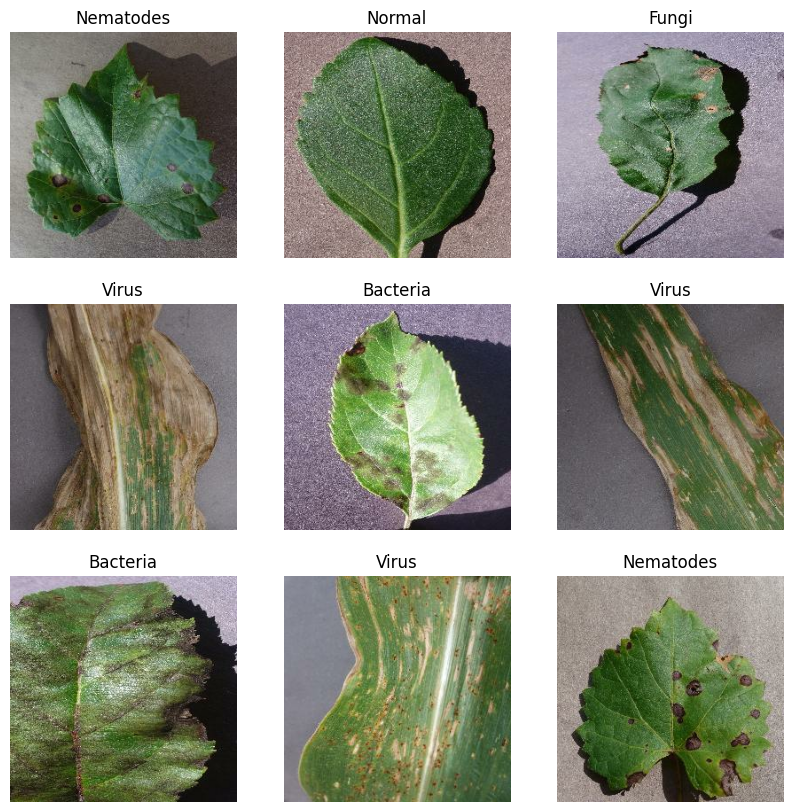

In [61]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

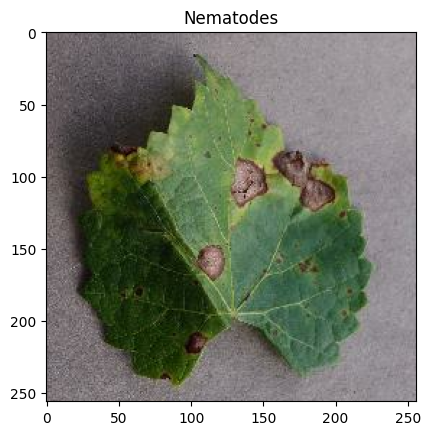

In [64]:
image, label = next(iter(train_ds))
_ = plt.imshow(image[0].numpy().astype("uint8"))
_ = plt.title(class_names[labels[0]])

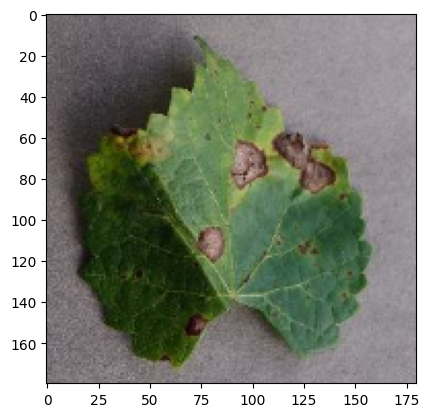

In [73]:
IMG_SIZE = 180

resize = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

result = resize(image[0].numpy().astype("uint8"))
_ = plt.imshow(result)

In [77]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(.2),
    layers.RandomContrast(.3),
])

image = tf.expand_dims(image[0].numpy().astype("uint8"), 0)

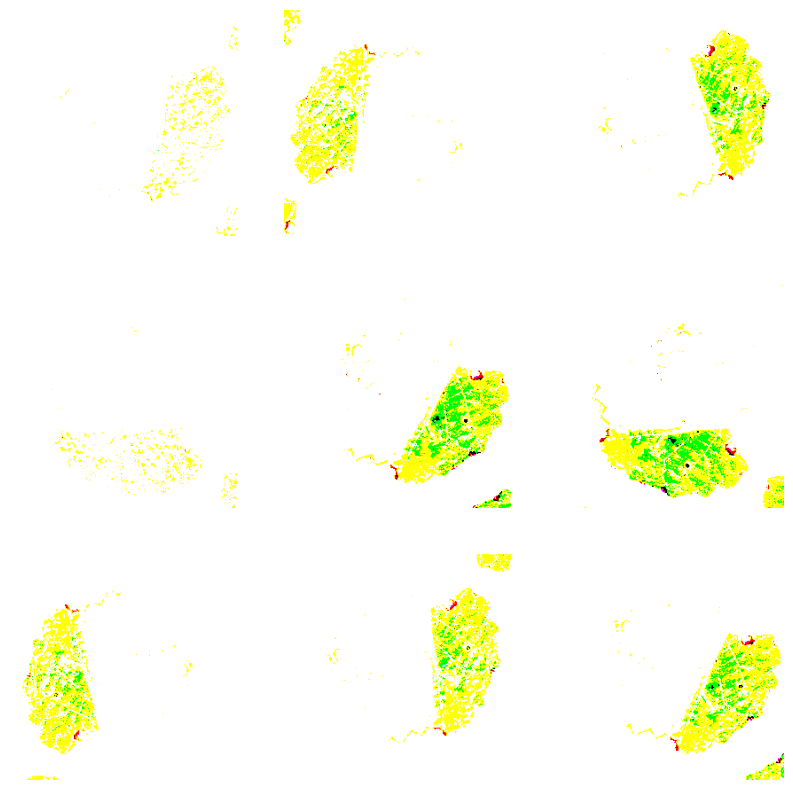

In [80]:
plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0]);
    plt.axis("off")
